In [1]:
%matplotlib inline 
from IPython.display import display 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


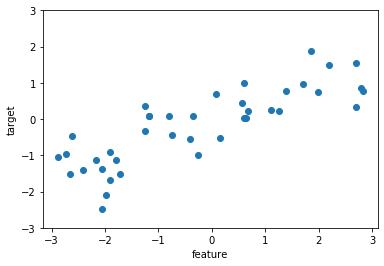

In [3]:
# 최근접 알고리즘

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

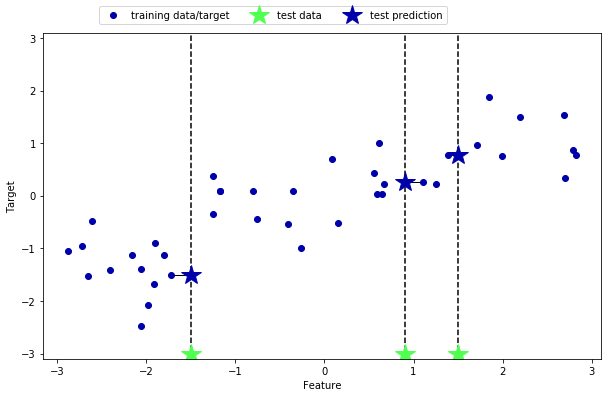

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

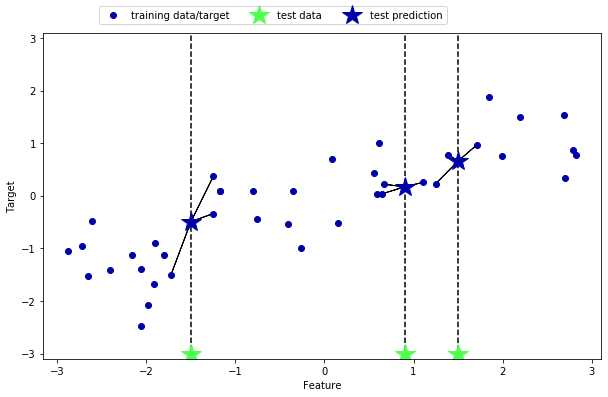

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [15]:
print("평가용 데이터 세트 예측 : \n", reg.predict(X_test))

평가용 데이터 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [16]:
print("평가용 데이터 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))
# R^2은 결정계수 : 회귀모델이 얼마나 적합한지 측정
# 83% 만큼 적합, 반영

평가용 데이터 세트 R^2:0.83


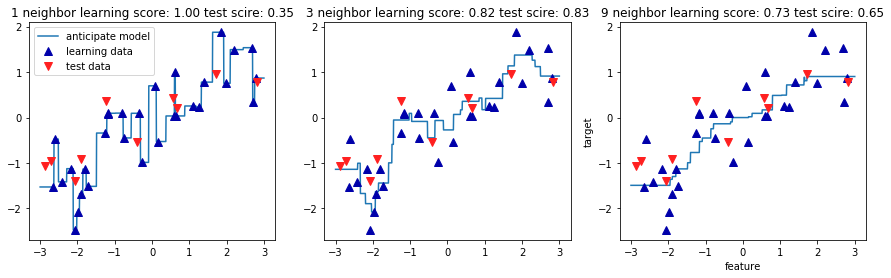

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    reg.fit(X_train, y_train) 
    ax.plot(line, reg.predict(line)) 
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),markersize=8) 
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor learning score: {:.2f} test scire: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
ax.set_xlabel("feature")
ax.set_ylabel("target") 
axes[0].legend(["anticipate model", "learning data", "test data"], loc="best")

w[0]: 0.393906  b: -0.031804


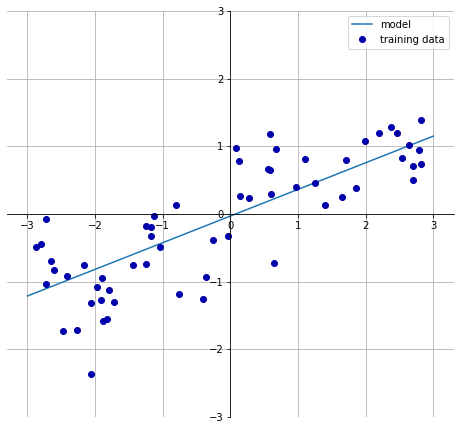

In [25]:
# 선형 회귀 모델 (피처가 많은 데이터 세트에서는 선형 모델이 성능이 좋을 수 있음.)

mglearn.plots.plot_linear_regression_wave()

In [26]:
# 선형회귀 (최소제곱법)

from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("lr.coef_ :", lr.coef_, type(lr.coef_))
print("lr.intercept_:", lr.intercept_, type(lr.intercept_))

lr.coef_ : [0.39390555] <class 'numpy.ndarray'>
lr.intercept_: -0.031804343026759746 <class 'numpy.float64'>


In [30]:
print("학습용 데이터 세트 점수 :{:.2f}".format(lr.score(X_train, y_train)))
print("평가용 데이터 세트 점수 :{:.2f}".format(lr.score(X_test, y_test)))

# 두 개의 점수의 차이가 적기 때문에 서로 비슷한 과소적합! (별로 좋은 예측 경우가 아님)
# 피처가 많은 경우는 과대적합일 가능성이 높음. (모델에는 정확한데 실제에선 부정확함)

학습용 데이터 세트 점수 :0.67
평가용 데이터 세트 점수 :0.66


In [32]:
# 리지 회귀 (피처 수가 많아 과대적합의 발생을 방지하기 위함, 다중공선성 방지)

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 세트의 형태:", boston.data.shape)

데이터 세트의 형태: (506, 13)


In [33]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [35]:
lr = LinearRegression().fit(X_train, y_train)

print("학습용 데이터 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("평가용 데이터 세트 점수:{:.2f}".format(lr.score(X_test, y_test)))

# 학습용은 잘 맞는데 실제는 잘 안맞음. 
# 모델의 정확도에 너무 치중해 현실세계의 반영이 어려움. (과대적합)

학습용 데이터 세트 점수:0.95
평가용 데이터 세트 점수:0.61


In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("학습용 데이터 세트 점수:{:.2f}".format(ridge.score(X_train, y_train)))
print("평가용 데이터 세트 점수:{:.2f}".format(ridge.score(X_test, y_test)))

# 학습용의 정확도는 낮아졌지만 평가용은 높아짐.

학습용 데이터 세트 점수:0.89
평가용 데이터 세트 점수:0.75


In [47]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("학습용 데이터 세트 점수:{:.2f}".format(ridge10.score(X_train, y_train)))
print("평가용 데이터 세트 점수:{:.2f}".format(ridge10.score(X_test, y_test)))

학습용 데이터 세트 점수:0.79
평가용 데이터 세트 점수:0.64


In [50]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수:{:.2f}".format(ridge01.score(X_train, y_train)))
print("평가용 데이터 세트 점수:{:.2f}".format(ridge01.score(X_test, y_test)))

학습용 데이터 세트 점수:0.93
평가용 데이터 세트 점수:0.77


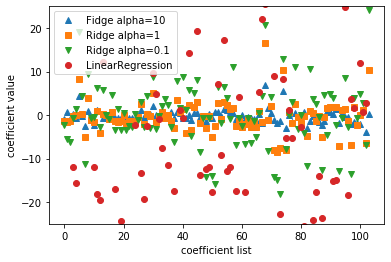

In [51]:
plt.plot(ridge10.coef_, '^', label= "Fidge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1") 
plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("coefficient list") 
plt.ylabel("coefficient value") 
xlims = plt.xlim( ) 
plt.xlim(xlims) 
plt.ylim(-25, 25) 
plt.legend( )

In [52]:
# 피처값이 많아야 정확
# but 피처값이 많아도 피처값의 회귀계수가 차이나면 특정 피처가 영향 높아짐.
# 너무 학습용 모델에 과적합되어 실제에서는 정확도가 낮아짐
# but ridge값을 너무 낮추면 일반화가 되어서 예측하기 쉽지않다.

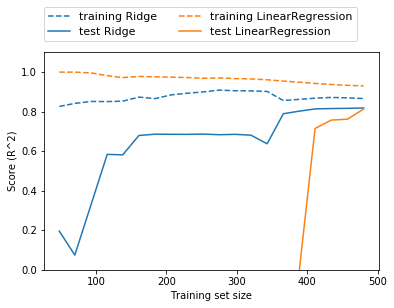

In [53]:
mglearn.plots.plot_ridge_n_samples()

# 데이터세트가 적을 때는 ridge가 좋을것이고 너무 많으면 성능이 낮아지는 것을 확인